In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Inspect and View Data

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   

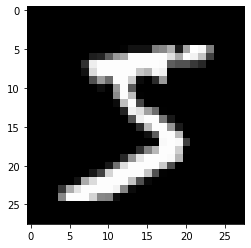

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train[0])
print(X_train[0])
plt.imshow(X_train[0], cmap='gray')

## Normalize Data

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

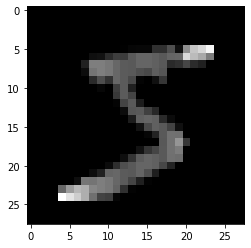

In [4]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

print(X_train[0])
plt.imshow(X_train[0], cmap='gray')

## Build Model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

## Compile and Fit model

In [6]:
# hyperparameters to play with

epochs = 5
batch_size = None
learning_rate=0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(
    optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5738 - accuracy: 0.8985 - val_loss: 1.5231 - val_accuracy: 0.9404
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5154 - accuracy: 0.9487 - val_loss: 1.5100 - val_accuracy: 0.9530
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5028 - accuracy: 0.9601 - val_loss: 1.5007 - val_accuracy: 0.9613
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4960 - accuracy: 0.9660 - val_loss: 1.4982 - val_accuracy: 0.9636
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4920 - accuracy: 0.9698 - val_loss: 1.4973 - val_accuracy: 0.9636


## Model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


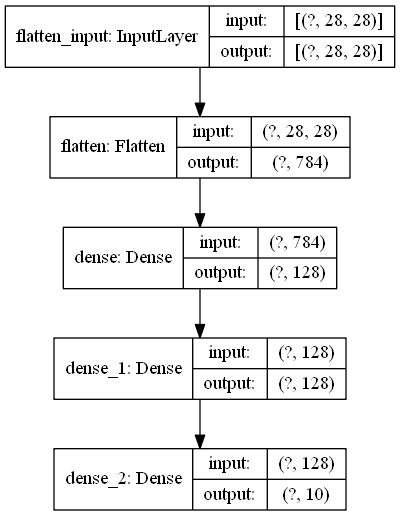

In [11]:
model.summary()
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
)

In [7]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.4973 - accuracy: 0.9636
1.4973444938659668 0.9635999798774719


## Plot loss and Accuracy charts

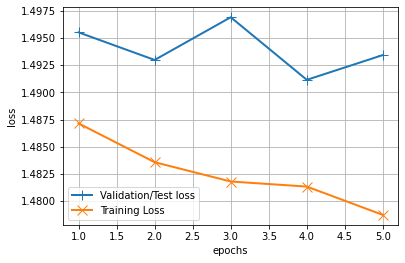

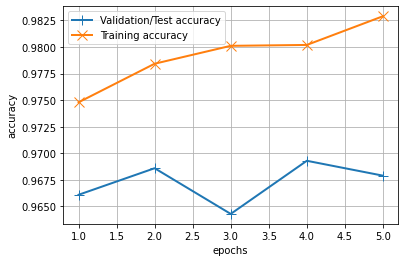

In [12]:
model_dict = model.history.history


loss_values = model_dict['loss']
val_loss_values = model_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

line_1 = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
line_2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line_1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line_2, linewidth=2.0, marker='x', markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()



loss_values = model_dict['accuracy']
val_loss_values = model_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

line_1 = plt.plot(epochs, val_loss_values, label='Validation/Test accuracy')
line_2 = plt.plot(epochs, loss_values, label='Training accuracy')
plt.setp(line_1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line_2, linewidth=2.0, marker='x', markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [14]:
model.save('simple_mnist_model.h5')

In [15]:
new_model = tf.keras.models.load_model('simple_mnist_model.h5')

In [16]:
predictions = new_model.predict([X_test])
print(predictions)

[[4.6097073e-29 1.5607858e-32 2.2435299e-18 ... 1.0000000e+00
  1.5678560e-26 9.7695523e-29]
 [8.4156142e-30 3.7727764e-17 1.0000000e+00 ... 2.5920314e-38
  2.4299070e-20 0.0000000e+00]
 [4.6740337e-23 1.0000000e+00 1.1552245e-15 ... 1.4308469e-12
  9.7013085e-11 3.1421557e-22]
 ...
 [3.7707207e-31 1.7752808e-24 2.2770907e-23 ... 1.3762181e-16
  9.0897415e-21 4.1107833e-20]
 [1.4561760e-20 7.1096548e-20 5.5453542e-20 ... 7.7296849e-20
  1.5355782e-12 8.6705501e-28]
 [1.3199120e-15 7.6641647e-24 7.5765490e-13 ... 1.8568938e-28
  4.2925736e-22 1.8928226e-30]]


6


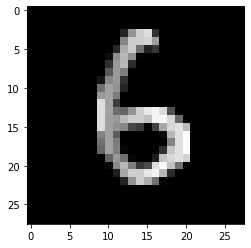

In [17]:
print(np.argmax(predictions[21]))
plt.imshow(X_test[21], cmap='gray')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.93      0.98      0.96       982
           5       0.97      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.94      0.97      0.96       974
           9       0.99      0.90      0.94      1009

    accuracy                           0.97     10000
   macro avg    

<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

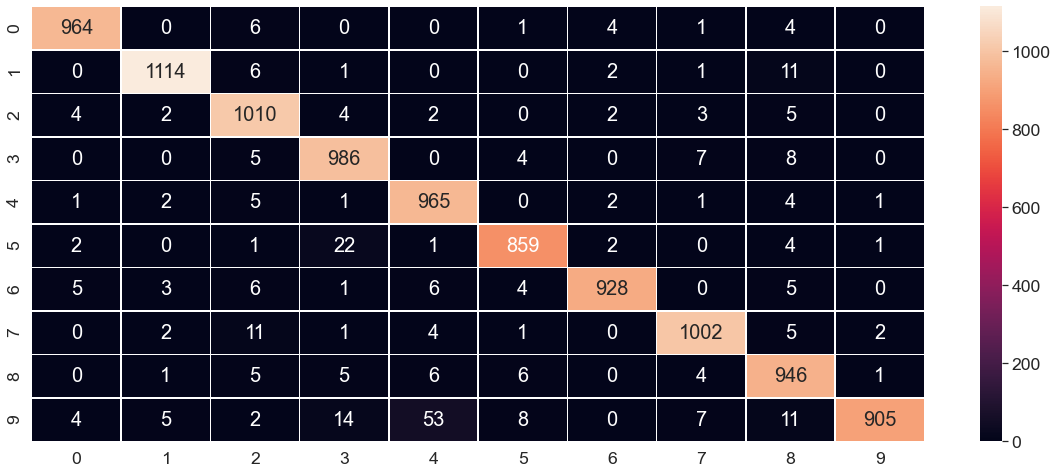

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize = (10,7))



y_pred = model.predict_classes(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
print(confusion_matrix)

sns.set(font_scale=1.6) # for label size
plt.figure(figsize = (20,8))
sns.heatmap(confusion_matrix, annot=True, fmt='g', annot_kws={"size": 20}, linewidths=0.5)
